# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from pathlib import Path

from functions import utils
from functions.plotting import plot_features

/var/folders/q_/pxh8rpm1021bvcmqb5qg17p00000gn/T/ipykernel_82851/3163876406.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
paramsscreen = {'backend': 'ps',
            'axes.labelsize': 15,
           'legend.fontsize': 15,
           'xtick.labelsize': 13,
           'ytick.labelsize': 13,
           'axes.titlesize': 16}

plt.rcParams.update(paramsscreen)

# Define paths and ligand IDs

In [3]:
features_path = Path("./feature_files")

ligands = ["pp000067", "pp000085", "pp000091", "pp000110", "pp000133", "pp000135",
           "pp000298", "pp000321", "pp000390", "pp000425", "pp000458", "pp000670"]

weighted_term = 'low_E'

In [4]:
dft_opt_features = pd.read_csv(features_path / "dft_opt_sp_features_summary.csv")
crest_features = pd.read_csv(features_path / "crest_sp_features_summary.csv")

# Process DFT descriptors

## Define electronic, geometric and steric features and average across all ligands

### Descriptors from DFT refined structures

In [5]:
# electronic descriptors
homo_boltz_av = dft_opt_features[f'HOMO_{weighted_term}'].mean()
lumo_boltz_av = dft_opt_features[f'LUMO_{weighted_term}'].mean()
dipole_boltz_av = dft_opt_features[f'dipole(Debye)_{weighted_term}'].mean()
dft_opt_features[f'NBO_av_charge_Cl_{weighted_term}'] = dft_opt_features[[f'NBO_charge_Cl1_{weighted_term}', f'NBO_charge_Cl2_{weighted_term}']].mean(axis=1)
cl_nbo_boltz_av = dft_opt_features[f'NBO_av_charge_Cl_{weighted_term}'].mean()
dft_opt_features[f'NBO_av_charge_P_{weighted_term}'] = dft_opt_features[[f'NBO_charge_P1_{weighted_term}', f'NBO_charge_P2_{weighted_term}']].mean(axis=1)
p_nbo_boltz_av = dft_opt_features[f'NBO_av_charge_P_{weighted_term}'].mean()
pd_nbo_boltz_av = dft_opt_features[f'NBO_charge_Pd_{weighted_term}'].mean()
dft_opt_features[f'NMR_av_shift_P_{weighted_term}'] = dft_opt_features[[f'NMR_shift_P1_{weighted_term}', f'NMR_shift_P2_{weighted_term}']].mean(axis=1)
p_nmr_boltz_av = dft_opt_features[f'NMR_av_shift_P_{weighted_term}'].mean()
dft_opt_features[f'aniso_NMR_av_shift_P_{weighted_term}'] = dft_opt_features[[f'aniso_NMR_shift_P1_{weighted_term}', f'aniso_NMR_shift_P1_{weighted_term}']].mean(axis=1)
aniso_p_nmr_boltz_av = dft_opt_features[f'aniso_NMR_av_shift_P_{weighted_term}'].mean()

# geometric descriptors
dft_opt_features[f'distance_av_Pd_Cl(Å)_{weighted_term}'] = dft_opt_features[[f'distance_Pd_Cl1(Å)_{weighted_term}', f'distance_Pd_Cl2(Å)_{weighted_term}']].mean(axis=1)
pd_cl_boltz_av = dft_opt_features[f'distance_av_Pd_Cl(Å)_{weighted_term}'].mean()
dft_opt_features[f'distance_av_Pd_P(Å)_{weighted_term}'] = dft_opt_features[[f'distance_Pd_P1(Å)_{weighted_term}', f'distance_Pd_P2(Å)_{weighted_term}']].mean(axis=1)
pd_p_boltz_av = dft_opt_features[f'distance_av_Pd_P(Å)_{weighted_term}'].mean()
bite_angle = dft_opt_features[f'Bite_angle_Pd(°)_{weighted_term}'].mean()

# steric descriptors
vbur_3a_boltz_av = dft_opt_features[f'%Vbur_Pd_3Å_{weighted_term}'].mean()
vbur_4a_boltz_av = dft_opt_features[f'%Vbur_Pd_4Å_{weighted_term}'].mean()
vbur_5a_boltz_av = dft_opt_features[f'%Vbur_Pd_5Å_{weighted_term}'].mean()
vbur_6a_boltz_av = dft_opt_features[f'%Vbur_Pd_6Å_{weighted_term}'].mean()
vbur_7a_boltz_av = dft_opt_features[f'%Vbur_Pd_7Å_{weighted_term}'].mean()
volume_boltz_av = dft_opt_features[f'volume(Bohr_radius³/mol)_{weighted_term}'].mean()
sasa_boltz_av = dft_opt_features[f'SASA_Pd_surface_area(Å²)_{weighted_term}'].mean()
gparam_boltz_av = dft_opt_features[f'%G_param_Pd_{weighted_term}'].mean()
solid_angle_boltz_av = dft_opt_features[f'Solid_angle_Pd(sr)_{weighted_term}'].mean()
solid_cone_angle_boltz_av = dft_opt_features[f'Solid_cone_angle_Pd(°)_{weighted_term}'].mean()

### Descriptors from CREST geometries

In [6]:
# electronic descriptors
cr_homo_boltz_av = crest_features[f'HOMO_{weighted_term}'].mean()
cr_lumo_boltz_av = crest_features[f'LUMO_{weighted_term}'].mean()
cr_dipole_boltz_av = crest_features[f'dipole(Debye)_{weighted_term}'].mean()
crest_features[f'NBO_av_charge_Cl_{weighted_term}'] = crest_features[[f'NBO_charge_Cl1_{weighted_term}', f'NBO_charge_Cl2_{weighted_term}']].mean(axis=1)
cr_cl_nbo_boltz_av = crest_features[f'NBO_av_charge_Cl_{weighted_term}'].mean()
crest_features[f'NBO_av_charge_P_{weighted_term}'] = crest_features[[f'NBO_charge_P1_{weighted_term}', f'NBO_charge_P2_{weighted_term}']].mean(axis=1)
cr_p_nbo_boltz_av = crest_features[f'NBO_av_charge_P_{weighted_term}'].mean()
cr_pd_nbo_boltz_av = crest_features[f'NBO_charge_Pd_{weighted_term}'].mean()
crest_features[f'NMR_av_shift_P_{weighted_term}'] = crest_features[[f'NMR_shift_P1_{weighted_term}', f'NMR_shift_P2_{weighted_term}']].mean(axis=1)
cr_p_nmr_boltz_av = crest_features[f'NMR_av_shift_P_{weighted_term}'].mean()
crest_features[f'aniso_NMR_av_shift_P_{weighted_term}'] = crest_features[[f'aniso_NMR_shift_P1_{weighted_term}', f'aniso_NMR_shift_P1_{weighted_term}']].mean(axis=1)
cr_aniso_p_nmr_boltz_av = crest_features[f'aniso_NMR_av_shift_P_{weighted_term}'].mean()

# geometric descriptors
crest_features[f'distance_av_Pd_Cl(Å)_{weighted_term}'] = crest_features[[f'distance_Pd_Cl1(Å)_{weighted_term}', f'distance_Pd_Cl2(Å)_{weighted_term}']].mean(axis=1)
cr_pd_cl_boltz_av = crest_features[f'distance_av_Pd_Cl(Å)_{weighted_term}'].mean()
crest_features[f'distance_av_Pd_P(Å)_{weighted_term}'] = crest_features[[f'distance_Pd_P1(Å)_{weighted_term}', f'distance_Pd_P2(Å)_{weighted_term}']].mean(axis=1)
cr_pd_p_boltz_av = crest_features[f'distance_av_Pd_P(Å)_{weighted_term}'].mean()
cr_bite_angle = crest_features[f'Bite_angle_Pd(°)_{weighted_term}'].mean()

# steric descriptors
cr_vbur_3a_boltz_av = crest_features[f'%Vbur_Pd_3Å_{weighted_term}'].mean()
cr_vbur_4a_boltz_av = crest_features[f'%Vbur_Pd_4Å_{weighted_term}'].mean()
cr_vbur_5a_boltz_av = crest_features[f'%Vbur_Pd_5Å_{weighted_term}'].mean()
cr_vbur_6a_boltz_av = crest_features[f'%Vbur_Pd_6Å_{weighted_term}'].mean()
cr_vbur_7a_boltz_av = crest_features[f'%Vbur_Pd_7Å_{weighted_term}'].mean()
cr_volume_boltz_av = crest_features[f'volume(Bohr_radius³/mol)_{weighted_term}'].mean()
cr_sasa_boltz_av = crest_features[f'SASA_Pd_surface_area(Å²)_{weighted_term}'].mean()
cr_gparam_boltz_av = crest_features[f'%G_param_Pd_{weighted_term}'].mean()
cr_solid_angle_boltz_av = crest_features[f'Solid_angle_Pd(sr)_{weighted_term}'].mean()
cr_solid_cone_angle_boltz_av = crest_features[f'Solid_cone_angle_Pd(°)_{weighted_term}'].mean()

## Calculate percent and absolute differences between DFT refined and CREST descriptor sets

In [7]:
# % differences

homo_pc_diff = utils.percent_difference(homo_boltz_av, cr_homo_boltz_av)
lumo_pc_diff = utils.percent_difference(lumo_boltz_av, cr_lumo_boltz_av)
dipole_pc_diff = utils.percent_difference(dipole_boltz_av, cr_dipole_boltz_av)
cl_nbo_pc_diff = utils.percent_difference(cl_nbo_boltz_av, cr_cl_nbo_boltz_av)
p_nbo_pc_diff = utils.percent_difference(p_nbo_boltz_av, cr_p_nbo_boltz_av)
pd_nbo_pc_diff = utils.percent_difference(pd_nbo_boltz_av, cr_pd_nbo_boltz_av)
p_nmr_pc_diff = utils.percent_difference(p_nmr_boltz_av, cr_p_nmr_boltz_av)
aniso_p_nmr_pc_diff = utils.percent_difference(aniso_p_nmr_boltz_av, cr_aniso_p_nmr_boltz_av)

pd_cl_pc_diff = utils.percent_difference(pd_cl_boltz_av, cr_pd_cl_boltz_av)
pd_p_pc_diff = utils.percent_difference(pd_p_boltz_av, cr_pd_p_boltz_av)
bite_angle_pc_diff = utils.percent_difference(bite_angle, cr_bite_angle)

vbur_3a_pc_diff = utils.percent_difference(vbur_3a_boltz_av, cr_vbur_3a_boltz_av)
vbur_4a_pc_diff = utils.percent_difference(vbur_4a_boltz_av, cr_vbur_4a_boltz_av)
vbur_5a_pc_diff = utils.percent_difference(vbur_5a_boltz_av, cr_vbur_5a_boltz_av)
vbur_6a_pc_diff = utils.percent_difference(vbur_6a_boltz_av, cr_vbur_6a_boltz_av)
vbur_7a_pc_diff = utils.percent_difference(vbur_7a_boltz_av, cr_vbur_7a_boltz_av)
volume_pc_diff = utils.percent_difference(volume_boltz_av, cr_volume_boltz_av)
sasa_pc_diff = utils.percent_difference(sasa_boltz_av, cr_sasa_boltz_av)
gparam_pc_diff = utils.percent_difference(gparam_boltz_av, cr_gparam_boltz_av)
solid_angle_pc_diff = utils.percent_difference(solid_angle_boltz_av, cr_solid_angle_boltz_av)
solid_cone_angle_pc_diff = utils.percent_difference(solid_cone_angle_boltz_av, cr_solid_cone_angle_boltz_av)

In [8]:
# absolute differences

homo_diff = utils.difference(homo_boltz_av, cr_homo_boltz_av)
lumo_diff = utils.difference(lumo_boltz_av, cr_lumo_boltz_av)
dipole_diff = utils.difference(dipole_boltz_av, cr_dipole_boltz_av)
cl_nbo_diff = utils.difference(cl_nbo_boltz_av, cr_cl_nbo_boltz_av)
p_nbo_diff = utils.difference(p_nbo_boltz_av, cr_p_nbo_boltz_av)
pd_nbo_diff = utils.difference(pd_nbo_boltz_av, cr_pd_nbo_boltz_av)
p_nmr_diff = utils.difference(p_nmr_boltz_av, cr_p_nmr_boltz_av)
aniso_p_nmr_diff = utils.difference(p_nmr_boltz_av, cr_p_nmr_boltz_av)

pd_cl_diff = utils.difference(pd_cl_boltz_av, cr_pd_cl_boltz_av)
pd_p_diff = utils.difference(pd_p_boltz_av, cr_pd_p_boltz_av)
bite_angle_diff = utils.difference(bite_angle, cr_bite_angle)

vbur_3a_diff = utils.difference(vbur_3a_boltz_av, cr_vbur_3a_boltz_av)
vbur_4a_diff = utils.difference(vbur_4a_boltz_av, cr_vbur_4a_boltz_av)
vbur_5a_diff = utils.difference(vbur_5a_boltz_av, cr_vbur_5a_boltz_av)
vbur_6a_diff = utils.difference(vbur_6a_boltz_av, cr_vbur_6a_boltz_av)
vbur_7a_diff = utils.difference(vbur_7a_boltz_av, cr_vbur_7a_boltz_av)
volume_diff = utils.difference(volume_boltz_av, cr_volume_boltz_av)
sasa_diff = utils.difference(sasa_boltz_av, cr_sasa_boltz_av)
gparam_diff = utils.difference(gparam_boltz_av, cr_gparam_boltz_av)
solid_angle_diff = utils.difference(solid_angle_boltz_av, cr_solid_angle_boltz_av)
solid_cone_angle_diff = utils.difference(solid_cone_angle_boltz_av, cr_solid_cone_angle_boltz_av)

# Plotting

## Percentage and absolute value comparisons

### Setup descriptors for plotting

In [9]:
# bar graph plot values

electronic = ['HOMO', 'LUMO', 'Dipole', 'Cl NBO', 'P NBO', 'Pd NBO', 'P NMR', 'Aniso \nP NMR']
electronic_values = [homo_pc_diff, lumo_pc_diff, dipole_pc_diff, cl_nbo_pc_diff, p_nbo_pc_diff,
                    pd_nbo_pc_diff, p_nmr_pc_diff, aniso_p_nmr_pc_diff]

steric = ['Solid \ncone angle', '%Vbur \n($r=$3 Å)', '%Vbur \n($r=$4 Å)', '%Vbur \n($r=$5 Å)', '%Vbur \n($r=$6 Å)', 
          '%Vbur \n($r=$7 Å)', 'Volume', 'SASA', ]
steric_values = [solid_cone_angle_pc_diff, vbur_3a_pc_diff, vbur_4a_pc_diff, vbur_5a_pc_diff, vbur_6a_pc_diff, 
                vbur_7a_pc_diff, volume_pc_diff, sasa_pc_diff, ]

geometric = ['Pd–Cl \ndistance', 'Pd–P \ndistance', 'Bite \nangle']
geometric_values = [pd_cl_pc_diff, pd_p_pc_diff, bite_angle_pc_diff]

fmos = ['HOMO', 'LUMO']
fmo_values = [homo_diff, lumo_diff]

nbos = ['Cl NBO', 'P NBO', 'Pd NBO']
nbo_values = [cl_nbo_diff, p_nbo_diff, pd_nbo_diff]

nmrs = ['P NMR', 'Aniso \nP NMR']
nmr_values = [p_nmr_diff, aniso_p_nmr_diff]

distances = ['Pd–Cl \ndistance', 'Pd–P \ndistance']
distance_values = [pd_cl_diff, pd_p_diff]

bite = ['Bite \nangle']
bite_value = [bite_angle_diff]

vburs = ['%VBur \n($r=$3 Å)', '%Vbur \n($r=$4 Å)', '%Vbur \n($r=$5 Å)', '%Vbur \n($r=$6 Å)', '%Vbur \n($r=$7 Å)']
vbur_values = [vbur_3a_diff, vbur_4a_diff, vbur_5a_diff, vbur_6a_diff, vbur_7a_diff]

volumes = ['Volume', 'SASA']
volume_values = [volume_diff, sasa_diff]

solid_angles = ['%G parameter', 'Solid angle', 'Solid cone angle']
solid_angle_values = [gparam_diff, solid_angle_diff, solid_cone_angle_diff]

### Generate plots

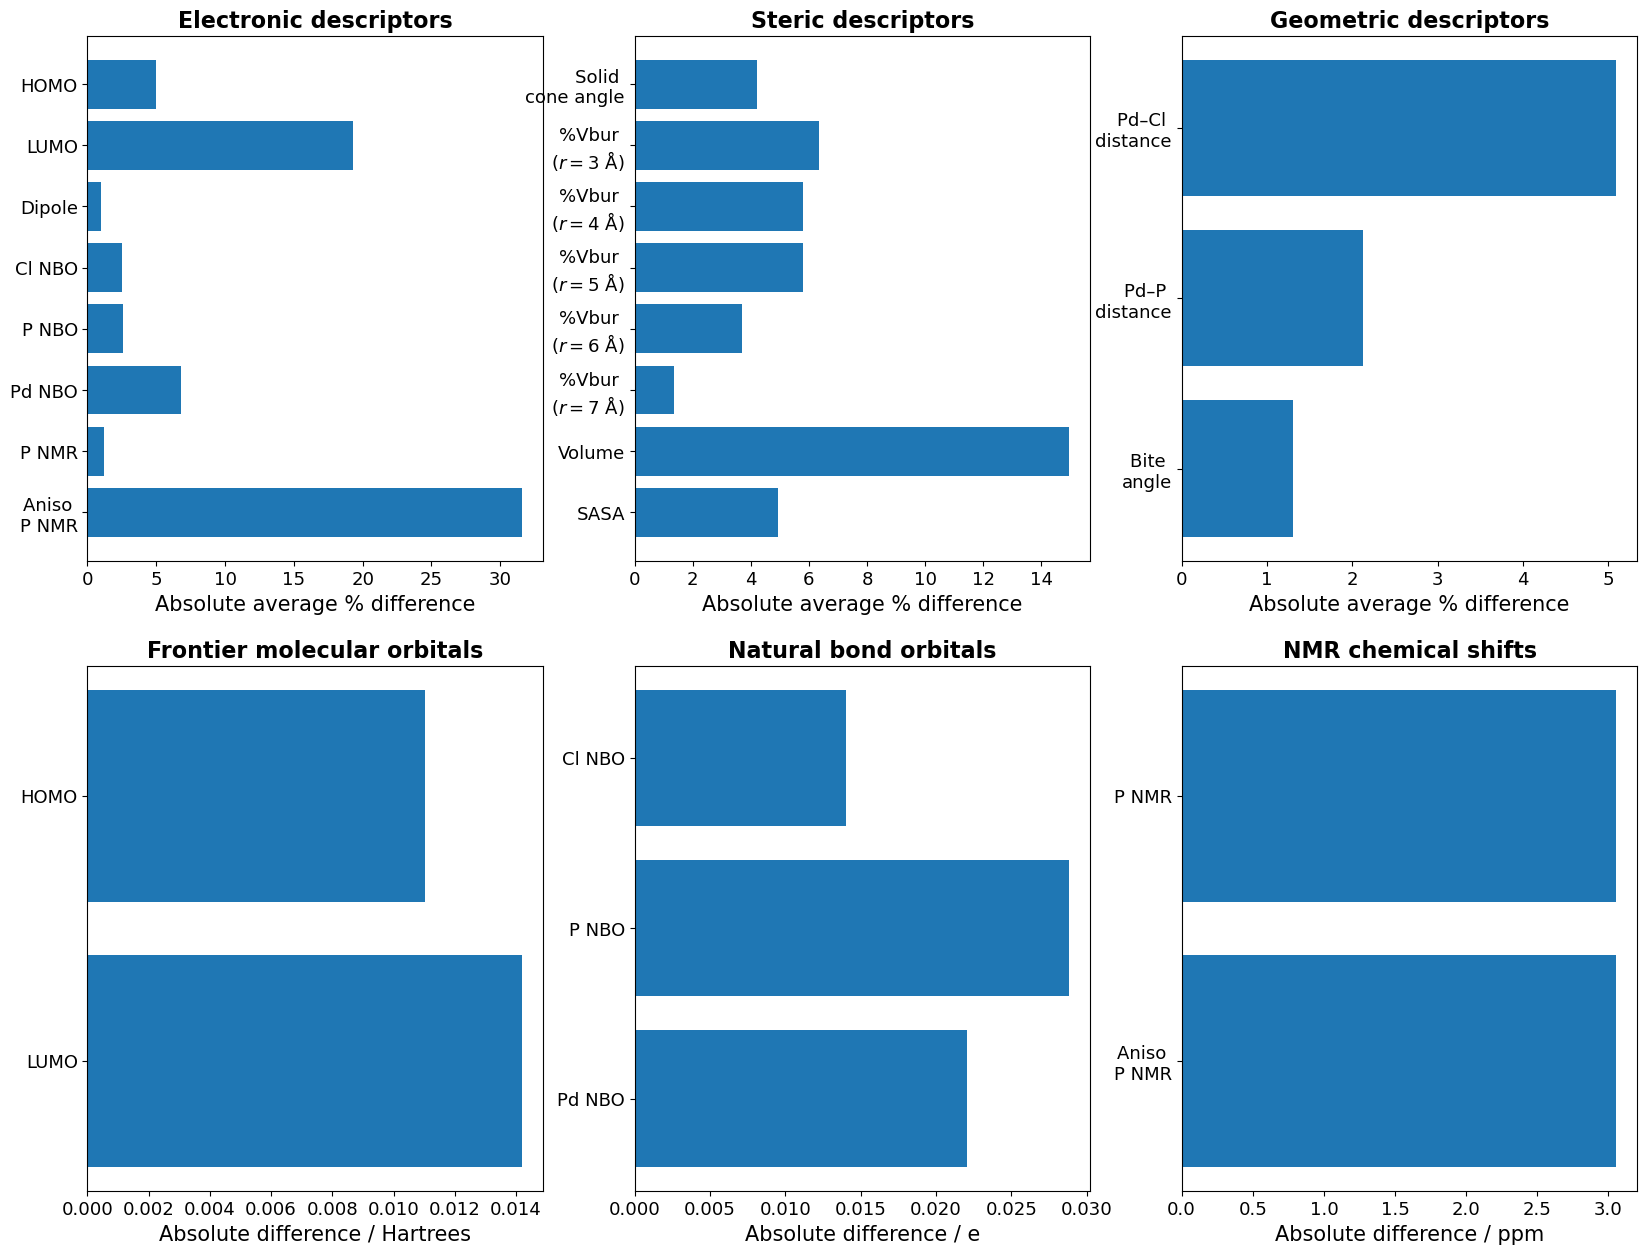

In [10]:
fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(nrows=2, ncols=3, figsize=(20,15))

# plot feature absolute percentage differences
plot_features.feature_bars(electronic, electronic_values, ax=ax0,
                           title='Electronic descriptors',
                           xlabel='Absolute average % difference')
plot_features.feature_bars(steric, steric_values, ax=ax1,
                           title='Steric descriptors',
                           xlabel='Absolute average % difference')
plot_features.feature_bars(geometric, geometric_values, ax=ax2,
                           title='Geometric descriptors',
                           xlabel='Absolute average % difference')

# plot feature absolute differences
plot_features.feature_bars(fmos, fmo_values, ax=ax3,
                           title='Frontier molecular orbitals',
                           xlabel='Absolute difference / Hartrees')
plot_features.feature_bars(nbos, nbo_values, ax=ax4,
                           title='Natural bond orbitals',
                           xlabel='Absolute difference / e')
plot_features.feature_bars(nmrs, nmr_values, ax=ax5,
                           title='NMR chemical shifts',
                           xlabel='Absolute difference / ppm')

## Descriptor set colinearity

### Setup descriptors to plot

In [11]:
e_descriptor_list = [f'HOMO_{weighted_term}', f'LUMO_{weighted_term}', f'dipole(Debye)_{weighted_term}',
                    f'NBO_av_charge_Cl_{weighted_term}', f'NBO_av_charge_P_{weighted_term}', f'NBO_charge_Pd_{weighted_term}', 
                     f'NMR_av_shift_P_{weighted_term}', f'aniso_NMR_av_shift_P_{weighted_term}']

steric_descriptor_list = [f'Solid_cone_angle_Pd(°)_{weighted_term}', f'%Vbur_Pd_3Å_{weighted_term}', f'%Vbur_Pd_4Å_{weighted_term}', 
                         f'%Vbur_Pd_5Å_{weighted_term}', f'%Vbur_Pd_6Å_{weighted_term}',
                         f'%Vbur_Pd_7Å_{weighted_term}', f'volume(Bohr_radius³/mol)_{weighted_term}',
                         f'SASA_Pd_surface_area(Å²)_{weighted_term}']

geometric_descriptor_list = [f'distance_av_Pd_Cl(Å)_{weighted_term}', f'distance_av_Pd_P(Å)_{weighted_term}', f'Bite_angle_Pd(°)_{weighted_term}']

### Plot electronic descriptors

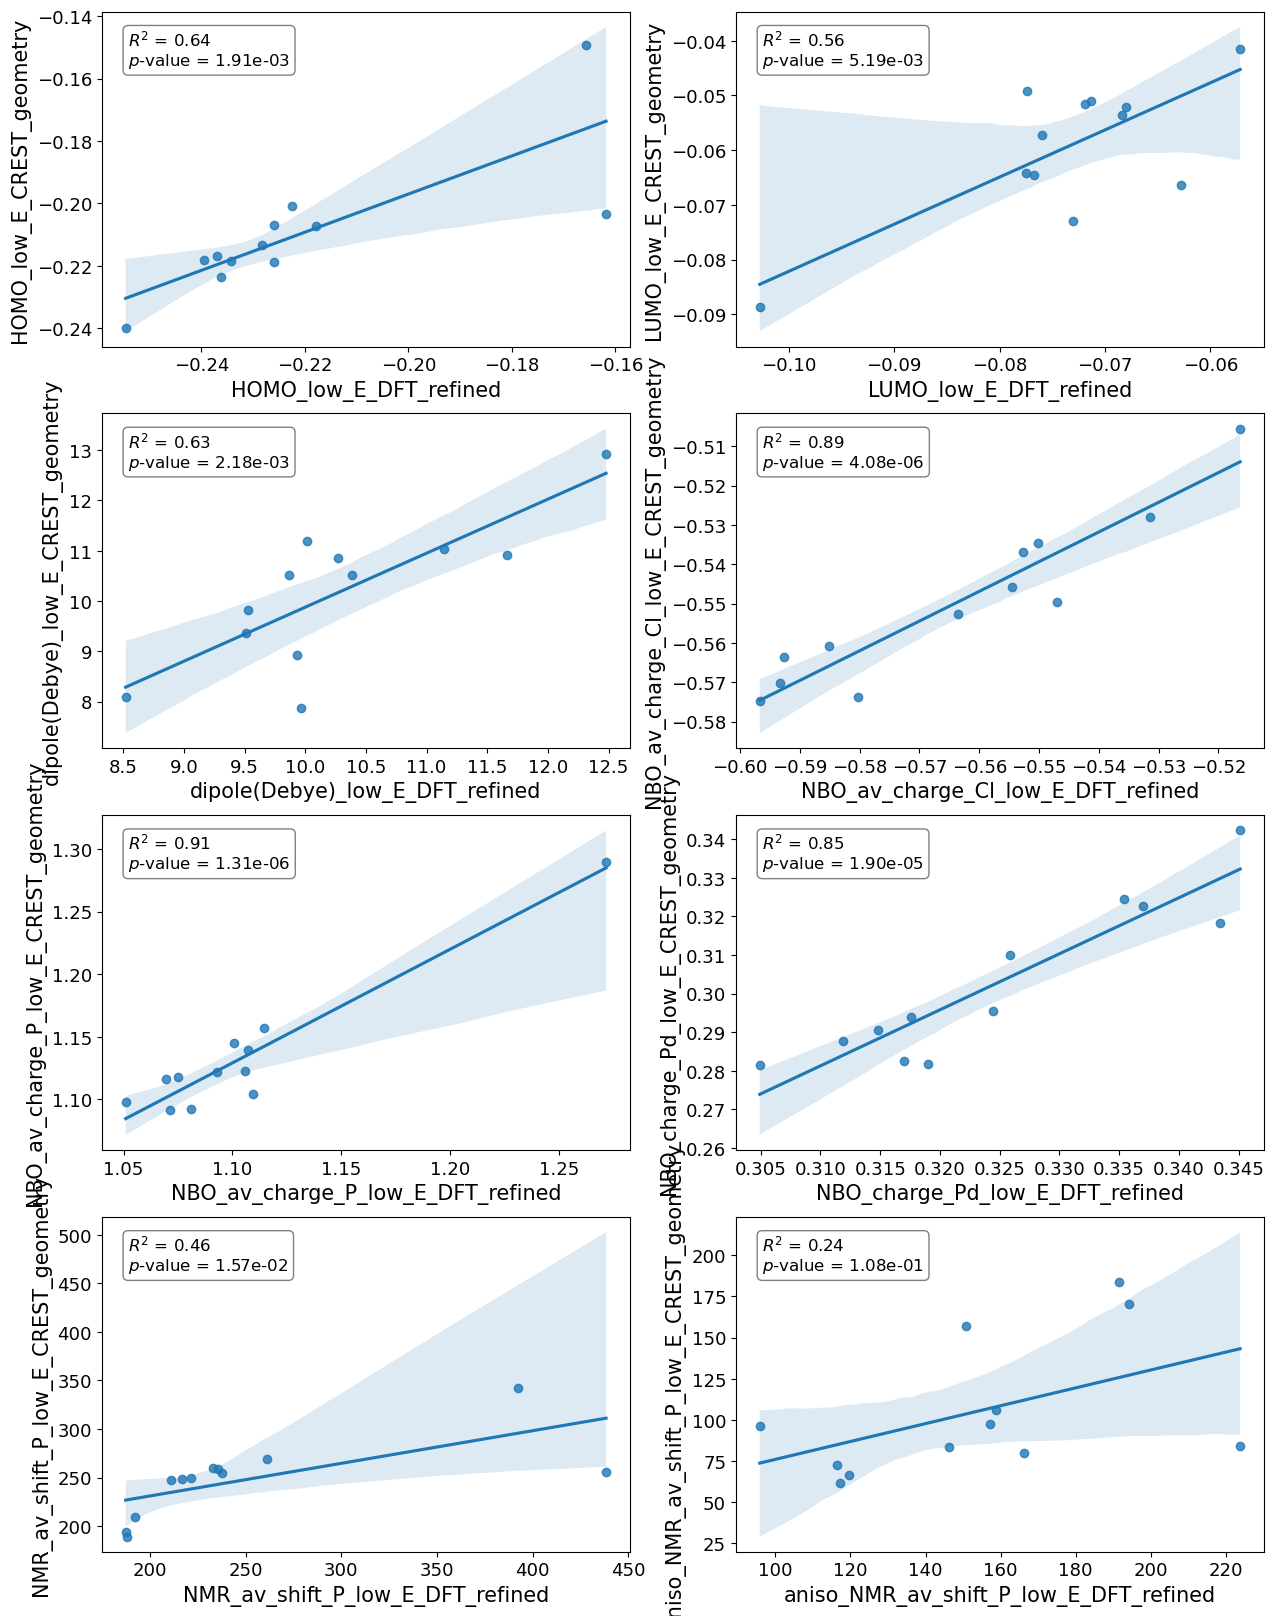

In [12]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15,20))

for i, ax in zip(e_descriptor_list, axs.ravel()[:len(e_descriptor_list)]):
    plot_features.plot_regression(dft_opt_features[i], crest_features[i], ax=ax)
    ax.set_xlabel(f"{i}_DFT_refined")
    ax.set_ylabel(f"{i}_CREST_geometry")

### 3.2.2. Plot steric descriptors

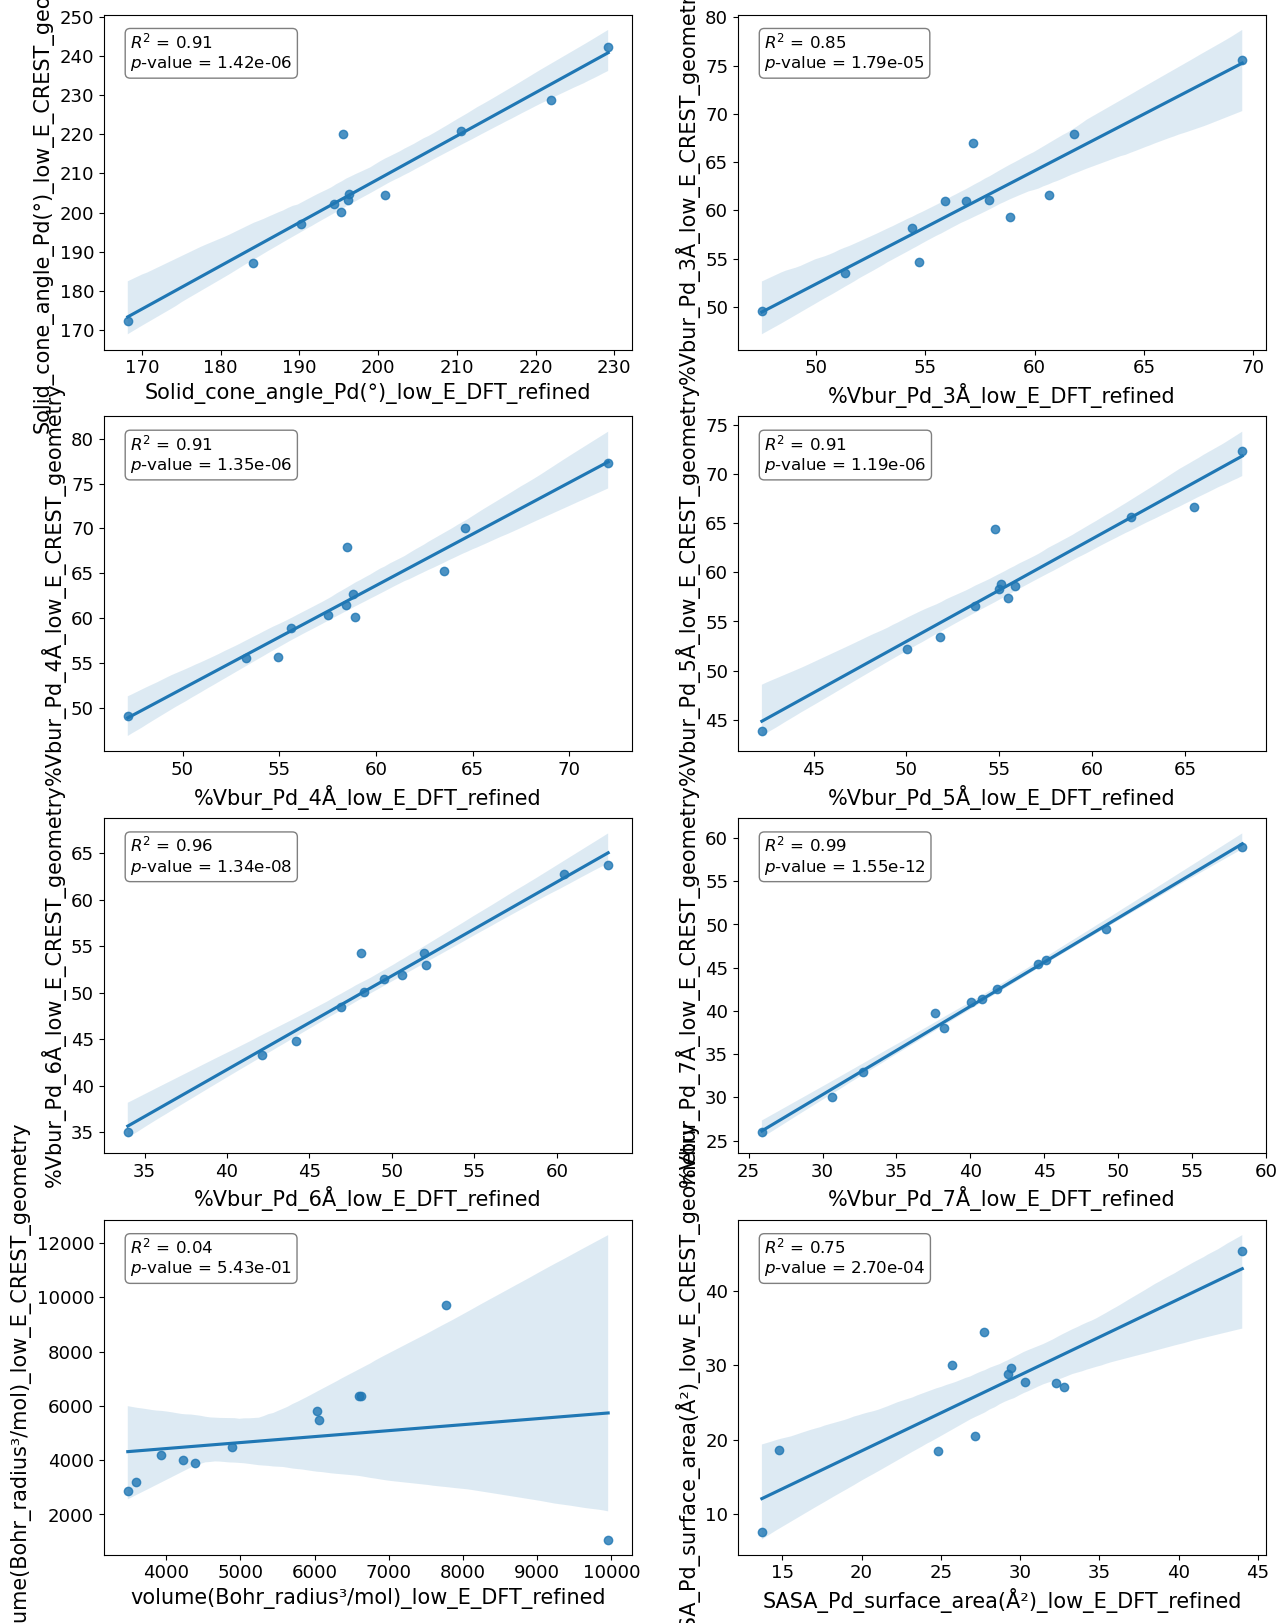

In [13]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15,20))

for i, ax in zip(steric_descriptor_list, axs.ravel()[:len(steric_descriptor_list)]):
    plot_features.plot_regression(dft_opt_features[i], crest_features[i], ax=ax)
    ax.set_xlabel(f"{i}_DFT_refined")
    ax.set_ylabel(f"{i}_CREST_geometry")

### 3.2.3. Plot geometric descriptors

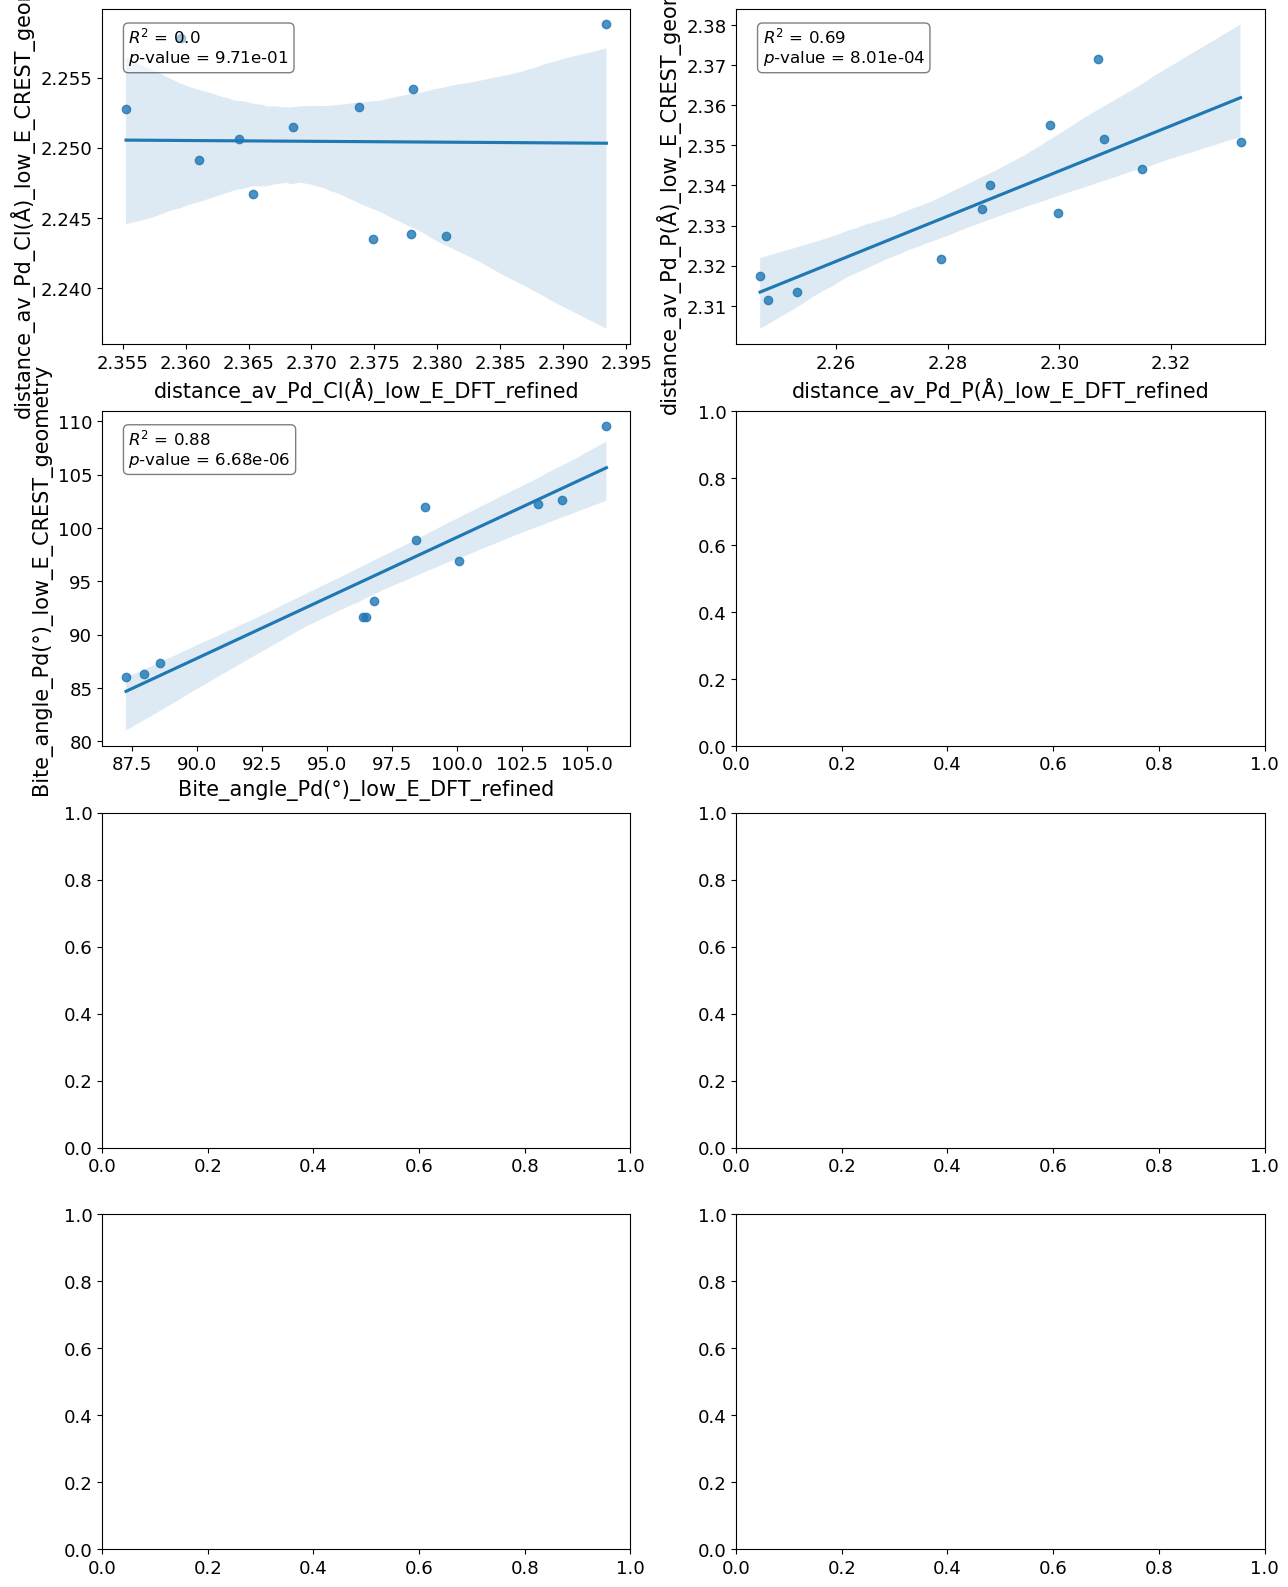

In [14]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15,20))

for i, ax in zip(geometric_descriptor_list, axs.ravel()[:len(geometric_descriptor_list)]):
    plot_features.plot_regression(dft_opt_features[i], crest_features[i], ax=ax)
    ax.set_xlabel(f"{i}_DFT_refined")
    ax.set_ylabel(f"{i}_CREST_geometry")